In [1]:
import data_prep
import textrank
import evaluation
import cluster
import glob
%matplotlib inline

[nltk_data] Downloading package punkt to
[nltk_data]     /home/gusklezju@GU.GU.SE/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/gusklezju@GU.GU.SE/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#path_to_data = "../CNN_corpus"
files = glob.glob("data/texts/*")

In [3]:
# read files into dataframes
texts_df, summaries_df = data_prep.get_data(files)

In [4]:
texts_df.head()
#summaries_df.head()

,filename,text_num,text
0,data/texts/train_000.bin,1,editor s note in our behind the scenes serie...
1,data/texts/train_000.bin,2,london england lrb reuters rrb harry potter ...
2,data/texts/train_000.bin,3,minneapolis minnesota lrb cnn rrb drivers w...
3,data/texts/train_000.bin,4,baghdad iraq lrb cnn rrb dressed in a super...
4,data/texts/train_000.bin,5,washington lrb cnn rrb doctors removed five s...


In [5]:
# check if data was read in correctly
data_prep.check_data(texts_df, summaries_df)

check complete


In [6]:
# get a random sample to test summarizer on
r_text, r_summary = data_prep.random_sample(texts_df, summaries_df)

file: data/texts/train_002.bin
article: washington lrb cnn rrb  computer hackers have embedded software in the united states  electricity grid and other infrastructure that could potentially disrupt service or damage equipment  two former federal officials told cnn . the exofficials say code also has been found in computer systems of oil and gas distributors . the code in the power grid was discovered in 2006 or 2007  according to one of the officials  who called it  the 21st century version of cold war spying .  department of homeland security director janet napolitano would not confirm such a breach  but said wednesday that there has been no known damage caused by one .  there have been  to my knowledge  no disruptions of power on any grid caused by a deliberate cyberattack on our infrastructure  on the grid   napolitano said .  nonetheless  we remain in constant protection  prevention  education  resiliency mode and we work with the utility sector particularly on that .  watch secur

In [7]:
# load pre-trained embeddings for textrank 
embs = textrank.get_embeddings("../glove.6B.100d.txt")

loaded embeddings


In [8]:
# summarize random sample with textrank
r_sum_textrank = textrank.get_summary([r_text], embs, 3)

napolitano said the vulnerability of the nation s power grid to cyberattacks  has been something that the department of homeland security and the energy sector have known about for years   and that the department has programs in place to fight such attacks . but he said people in the intelligence community assume that such attacks from countries like china go on all the time . instead  he said  that government likely would keep the bugs in place in case of a future conflict with the united states . 


In [9]:
# summarize sample with cluster/skipthoughts
r_sum_cluster = cluster.get_summary([r_text], 3)

/usr/local/lib64/python3.7/site-packages/torch/nn/modules/rnn.py:61: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.25 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


napolitano said the vulnerability of the nation s power grid to cyberattacks  has been something that the department of homeland security and the energy sector have known about for years   and that the department has programs in place to fight such attacks . it s very easy to embed code in russian or chinese when you re not russian or chinese . if you have somebody who knows what they re doing writing that code and embedding it in a clever way  you can look right at it and not recognize it   said scott borg  director and chief economist at the u.s. cyber consequences unit  an independent research institute .


In [10]:
# original summary for comparison
r_summary

's 2 exfederal officials say u.s. electrical grid  other infrastructure targeted . s s homeland security does nt confirm a breach  says no damage caused by one . s s expert says this kind of code could be difficult to detect . s'

In [11]:
# calculate rouge score for textrank example
tr = evaluation.get_rouge(r_sum_textrank, [r_summary])

{'rouge-1': {'f': 0.11023621610019238, 'p': 0.08139534883720931, 'r': 0.17073170731707318}, 'rouge-2': {'f': 0.015999995648001183, 'p': 0.011764705882352941, 'r': 0.025}, 'rouge-l': {'f': 0.14893616559529213, 'p': 0.11666666666666667, 'r': 0.20588235294117646}}


In [12]:
# calculate rouge score for cluster/skipthough example
cl= evaluation.get_rouge(r_sum_cluster, [r_summary])

{'rouge-1': {'f': 0.1476510027224, 'p': 0.10185185185185185, 'r': 0.2682926829268293}, 'rouge-2': {'f': 0.027210880392429655, 'p': 0.018691588785046728, 'r': 0.05}, 'rouge-l': {'f': 0.16666666235253785, 'p': 0.12162162162162163, 'r': 0.2647058823529412}}


In [13]:
# extract smaller datasets for evaluation (for efficiency/time reasons)
texts_s = texts_df[:500]
summaries_s = summaries_df[:500]

In [14]:
# calculate average score with textrank
tr_overall = evaluation.rouge_overall_textrank(texts_s, summaries_s, embs)

starting in 2008  many inmates who would otherwise have been brought to the  forgotten floor  will instead be sent to a new mental health facility  the first step on a journey toward longterm treatment  not just punishment . go inside the  forgotten floor   at first  it s hard to determine where the people are . leifman says 200 years ago people were considered  lunatics  and they were locked up in jails even if they had no charges against them . 
i do nt plan to be one of those people who  as soon as they turn 18  suddenly buy themselves a massive sports car collection or something similar   he told an australian interviewer earlier this month . watch ireporter give her review of potter s latest  there is life beyond potter  however . people are always looking to say  kid star goes off the rails    he told reporters last month . 
occasionally  a pickup truck with a medic inside would drive to get an injured person and bring him back up even ground  hink told cnn . ambulances were also

lindsay lohan may still get work after her legal problems are settled  but the cost will be high . while some producers may balk at conditions for hiring problematic stars  experts say that unless an actor is serving time in prison  even the most volatile can be covered  albeit at a high cost . insurance experts say the industry has long dealt with similar situations  although they may seem more frequent with the recent heavy media scrutiny of lohan and fellow troubled party girls paris hilton and britney spears . 
however  the real success of  oh  carol  came a few months later  when it inspired king to write a rebuttal entitled  oh  neil . written for  unknown  as the songwriters apparently make up a different story about its inspiration every time they re asked . and what a tracksuit it must have been  the 1975 song remains one of the most popular disco hits ever  leaving thousands of hustle enthusiasts wondering just what billie jean king had to do with philadelphia  anyway . 
it w

we do nt know why  but it s perfectly clear that glaciers change even though the temperature is cooling at the place that they ve occurred   he said . one lsb was rsb that this was going to be significant because it was going to be an example of climate change . there are several possible reasons for the warming  scientists say . 
other french charities earlier had questioned whether zoe s ark could legally arrange adoption of children from darfur  and contacted french authorities  according to french newspapers and the associated press . but the four women and three men are in good condition in custody  cajal said  based on his conversations with a spanish consular official who came from cameroon to chad and has been able to visit them . reporters without borders said it will work for the release of the three journalists arrested in chad . 
see photos of the hole the landslide left in la jolla  at least 111 homes were evacuated  but sanders said residents would be allowed to return to

watch iraqi girls describe a long way from home  the reason behind the jump in the number of iraqis at the school is a new government policy  for the first time since the start of the iraq war  jordan is allowing all iraqi children  regardless of refugee status  to enroll in statefunded schools . that s more than double the number of iraqi children enrolled in public school two years ago . but as families run out of money they had when they left iraq  they turn to public schools . 
see dramatic photos of storm survivors  sidr has already ruined bangladesh s rice harvest  but the international community is rallying to make sure the country does not suffer as acutely as it has in the past . international aid groups  including save the children  world vision  and the red crescent  which already have offices in bangladesh  are deploying resources to the cyclonestricken region but  like the government  they have found it nearly impossible to reach the more remote areas to assess conditions 

they illustrate what some people are really concerned about with immigration  and it goes well beyond words like  legal  or  illegal . not long ago  an employee at a local library came up with the radical idea of a bilingual story time where children could hear tales read to them in spanish . the article quotes orville tranby  a local community leader in cooperstown  who says that some residents have told him  face to face  that such facilities might attract hispanic immigrants who could change the local culture . 
one of qualcomm s first products was omnitracs  introduced in 1988  which is currently the largest satellitebased commercial mobile system for the transportation industry . the company has been listed among fortune s  100 best companies to work for in america  for nine years in a row and the magazine s list of  most admired companies . qualcomm is among the members of the sp 500 index  fortune 500  and a winner of the u.s. department of labor s  secretary of labor s opportun

with five weeks to go until the first contest of the 2008 nominating season  the republican candidates engaged in a freeforall  trying to differentiate their views on immigration  the iraq war  abortion  gun control and even whether they believed every word in the bible was true . kerr told cnn after the debate that he has not worked for the clinton campaign and was representing no one other than himself . we do nt need a federal abortion police  that s the last thing we need   paul said . 
when asked if prosecutors had made the family aware of colorado s witness protection program  the witness in the reynolds case said   all they told us was maybe we should move . the man  who asked not to be identified because of the sensitivity of the case  says the state did nothing to protect him after the 1999 conviction of keith reynolds for domestic abuse  even after prosecutors told him a hit had been put on his family . i felt like the da s office used my son to win their case but did not tak

what s happening right now is  because of the dysfunction and complexity of our immigration laws  we ve got people fighting overseas who are facing the impossible situation of having family members facing deportation back home   she said . making his deployment even tougher is the fact his wife may not be around when he comes back . gonzalez  who works on helicopters that bring cargo  supplies and military personnel in and out of iraq  testified before a house judiciary committee panel last month  detailing his situation and urging officials to consider some sort of policy to deal with cases like his  where military members  families could be deported while they re defending their country overseas . 
the win means zenit finish top of the table with 61 points  two points ahead of secondplaced spartak moscow  who beat city rivals dynamo 21 . ninetimes champions spartak took the lead midway through the firsthalf . russian international striker roman pavyuchenko netted the opening goal in 

when asked about the high number of former wrestlers who had died before they turned 50 years old  vince mcmahon said each person in the wwe bore responsibility for their own lives  especially outside the arena . watch one of the new wwe stars talk about being  straight edge    there s an expression in our business  that here is where you make your money . david black  who helped the nfl develop its drug program and now runs tests for the wwe  says twice that number have tested positive and been given a warning . 
you could be responsible for the fall of western civilization  just like justa grata honoria  the roman princess whose wild ways and lrb literally rrb naked ambition set off a chain reaction that culminated in the destruction of the roman empire . honoria got the barbarian s attention with a mutually beneficial proposal  if attila would rescue her  she would marry him  and he would get half of the western empire as her dowry . her savior would have to be powerful enough to de

will obama s refusal to kick mcclurkin off the concert bill hurt him  like many political squabbles  despite the national story  it depends how much the controversy resonates with voters in those crucial early states  iowa  new hampshire  nevada and south carolina . after that appearance  the obama campaign told cnn that republicans no longer had a choke hold on issues of faith and values . the campaign has vigorously promoted the candidate s faith  launching  40 days of faith and family  in september  which used bible study groups to tap into the black electorate . 
lrb cnn rrb  the owner of a north carolina beach house where seven college students died in a weekend fire said monday that his family s  lives were just changed forever  by the tragedy . it could be as much as a month until investigators know the cause of the fire  pruitt said . six other south carolina students were able to get out of the house in time . 
rice earlier said reports that the state department was finding it

bush said congress knows the current version of the children s health bill  does not have a chance   to get enough votes to override another veto . bush said the senate was  wasting valuable time  by taking up the children s health insurance bill  which he had earlier vetoed . watch bush describe what he thinks congress is doing wrong  house majority leader steny hoyer  dmaryland  issued a statement calling bush  the biggest obstacle  to extending health coverage to  10 million lowincome  workingclass american children . 
officer sandra vanhinkle was shot early last sunday and is out of the hospital and doing well  police say . lrb cnn rrb  a man named as a suspect in the fatal shooting of a philadelphia  pennsylvania  police officer last week was captured at a shelter in miami  florida  on tuesday  philadelphia police commissioner sylvester johnson said at a news conference . philadelphia mayor john f. street said people at the shelter recognized lewis from televised photos of the sus

clinton s 2002 vote shows a clear difference in judgment between the two of them  obama said . obama said clinton also had shown  flawed  judgment during the vote to authorize the iraq war five years ago . while clinton was campaigning sunday in new hampton  iowa  an audience member at a town hallstyle meeting pressed her on why she voted for the iran measure and asked why she had nt learned from past  mistakes . 
chowdhury said about 600000 people had fled  adding that about 2 million people lived along the coast . see victims pick up the pieces after the storm  the bangladeshi air force  army and navy are working to provide shelter for the many people who have been displaced . he said the extent of the cyclone s damage may be much worse because emergency relief had not been able to reach remote areas . 
watch how spears became user of  and prisoner to  fame  in addition to ordering the twiceweekly drug tests  gordon ordered spears to spend eight hours per week working with a  parenti

on tuesday  clinton won the florida primary  a contest her campaign said helped the senator regain momentum even though it awarded no delegates . but clinton  who has led in national surveys for much of the race  will be making her case as well . edwards suspended his presidential run wednesday in new orleans  louisiana  but he did nt endorse any candidate despite what aides described as furious lobbying campaigns by obama and clinton . 
mccartney said the early beatles knew they were a good band and were pretty sure of themselves  but starr said   we thought we d be really big in liverpool . but actually  a lot of kids know the music   starr said . and then i joined and then they got this record deal and look what happened . 
by 1995  joe was wfan s overnight guy  a title he held for almost a decade . the chicago bulls are the favorite team of kim jongil  who reportedly has a video library with every game jordan ever played . also known as  rainbow man   the bornagain rollen stewart a

it s not only one court  it is the saudi government that is fully behind punishing a woman who s been raped lsb and rsb punishing the lawyer who s trying to help her and doing that both because they ve spoken to the media   wilcke told cnn . 0lrb cnn rrb  a saudi arabian human rights attorney is asking the government to allow him to represent a woman who was gangraped  and then sentenced to prison for speaking out about the case . human rights watch said it has called on saudi arabia s king abdullah  to immediely void the verdict and drop all charges against the rape victim and to order the court to end its harassment of her lawyer . 
even though it is clear from the documents that the united states government did not encourage israel to acquire a nuclear deterrent  it became a fact of life   naftali said . we are declassifying the records today that laid the basis for richard nixon s decision in 1969 to accept the fact  a fact of life  that israel had a bomb  a nuclear device   said n

watch how townsend is planning to use her skills  she said she s been talking with the president about her planned departure for eight months . i m going to just take another job doing 20hour days  but this time in the private sector   said townsend  who has spent 25 years working in law enforcement and government . fran has always provided wise counsel on how to best protect the american people from the threat of terrorism   bush said in a statement . 
the affidavit said trenor admitted that after the body was found  zeigler had her type up a fake letter from the ohio department of children s services saying that riley was to be taken away . tuttoilmondo said police did investigate whether child protective services had taken riley away  something the mother had reportedly alleged . the toddler was last seen in texas  three or four months ago   tuttoilmondo said  although he did not know by whom . 
singh said he has been able to clear 1100 cases in just six months time compared to 500 

lrb cnn rrb  two tractortrailer trucks crashed and burst into flames thursday on a bridge between the united states and mexico  shutting a key border crossing and killing four people  police said . pharr emergency management coordinator elsa sanchez told the associated press the pickup truck had texas license plates  and the two 18wheelers and a minivan involved in the wreck appeared to have mexican plates . the bridge reopened on friday morning after texas department of trnasportation engineers inspected it  according to cnn affiliate krgv . 
most of the candidates said they did nt want to turn the assassination into a talking point  but it is just a week before the iowa caucuses  and world events not only change the conversation  they can change a campaign . watch how the assassination is resonating on the campaign trail  sen. barack obama s camp  which has spent a year pushing back on criticisms that he lacks experience  insisted they welcome the renewed talks on foreign policy and 

watch allen describe her first impression of stiles  allen said she and stiles had been in an onagain  offagain relationship for 10 years and that he was good with her children . todd allen said nobody realized the child may have been abused . also monday  stiles  former girlfriend told cnn she believes she put him in contact with the girl . 
so  romney emphasized the role of religion in public life more strongly than jfk did or would have . mr. romney s position on many of the issues are very different than jfk s . question  did kennedy s 1960 speech win him the presidency  sorensen  well  he obviously did nt lose it  nor did he free the country from the curse of anticatholicism . 
but in a report released monday  the world bank pointed out the reforms would succeed in helping palestinians only if they were accompanied by both donor aid and israeli actions . the world bank said the reforms would only succeed if they include gaza  where 40 percent of the palestinian population lives . 

mayor alan white  whose son played soccer on the same team as joshua last year  said he and many others in and around paradise have cut christmas trees in the same place where the family vanished . the pilots could see the  help  sign they had made with twigs on a nearby fourwheeldrive road  he said . if you re 50 feet from your car  you might not be able to find it   he said . 
very rarely  does the call result in a diversion  a decision made not by the doctor but by the pilot who must consider a number of variables beyond the passenger s health  she said . flight attendants with sick passengers call good samaritan hospital in phoenix  arizona  a levelone trauma center where emergency room physicians and a service able to translate 140 languages are on call to answer questions from any of 2 million airline passengers flying at any given time  she said . it could be used if there is a medical emergency on board  but that s not its purpose   he said . 
london  england lrb cnn rrb  the s

obama s visit to the city coincided with his endorsement sunday by the atlanta journalconstitution  which cited his  appeal across many of the lines that have divided america   adding that  both clinton and obama would make very good presidents  lsb but rsb obama is the person  this is his time . obama s lead over clinton among black men is more than 50 points  and among black women  once a clinton stronghold  obama has an 11point advantage   said keating holland  cnn s polling director . perhaps a debate on martin luther king day in south carolina should be made a muststop on the road to the white house every four years . 
allocate delegates yourself and see how the numbers add up  former president bill clinton said in february that if his wife won ohio and texas  she d go on to win the nomination . watch huckabee bow out  mccain is slated to go to the white house on wednesday to receive the endorsement of president bush  according to two republican sources . obama s campaign pressed 

watch the fire burn  most of the damage was to the top floor of the building . see where the hotel is located  no one was trapped  and there were no reports of major injuries  said ed cagalo of the clark county fire department . a bit over an hour after it began  the fire was fully contained  according to the fire departments in las vegas and clark county . 
hared is the second journalist to be killed this year  according to the committee to protect journalists . another member of the team was slightly wounded  the group said in a posting on its web site . this is a targeted attack and we declare that this brutal killing on the journalist and the aid workers is an attack on the society itself   said nusoj secretary general omar faruk osman  in a news release . 
blackwater guards  protecting u.s. officials in iraq  face dangerous circumstances every day and have navigated the vast majority of those situations without any violence  prince told cnn . american officials are also coming up 

and i managed to persuade him to give me a study to start my magazine and it was only when he actually finally came to me and said  look  you re either going to have to do your school work or your magazine   that i said  well  goodbye . what was it in your character that you think made him make that observation  branson  well i suspect the fact that at age 13 i m writing him letters on how he could organize the catering better and how the school could save money  and if they save money they could then put it into better facilities for the students . benjamin  without your persona do you think the virgin brand could have ever become what it became  branson  i think the particular virgin brand perhaps needed me  in the past  to get out there and be adventurous  and therefore to give the brand an adventurous feeling  take on the big guys  which we did  and beat the big guys and that s what s created the virgin brand . 
sen. larry craig  ridaho  initially said he would resign at the end of

she was being treated for a fractured arm and several cuts  but tests  including a cat scan  were under way to make sure nothing else was wrong  quidano said . she thought she was at home and wondered why an airplane wing was in her house  her mother said . authorities think the small singleengine cessna ran into bad weather . 
see where the quake struck  highlevel government sources said the workers had been rescued . lrb cnn rrb  thousands of chileans may have to sleep in the streets wednesday night after a 7.7 magnitude earthquake rattled the north part of the country  killing at least two people  injuring dozens and destroying hundreds of homes . the government s office of national emergency reported that two women had died and others were injured in the city . 
brown said a witness came forward friday morning with a statement and evidence that convinced authorities lauterbach was dead . 4jacksonville  north carolina lrb cnn rrb  police believe they have found the remains of a miss

he calls on the senior leadership of the country to cooperate fully with this mission in order to take advantage of the willingness of the united nations to assist in the process of a national reconciliation through dialogue   said a u.n. statement . united nations lrb cnn rrb  u.n. secretarygeneral ban kimoon is  urgently dispatching  a special envoy to myanmar  a statement from his office said wednesday  following reports of violent clashes in that country between security forces and protesters . u.s. president george w. bush  speaking to the u.n. general assembly s annual session tuesday before the crackdown  said his administration would impose stiffer sanctions against the country s military regime . 
even though the thief was caught   the swedish government refused to return the paintings  claiming that according to swedish law  the auction buyers had purchased the paintings in good faith   according to the web site . one london art dealer  who said he has handled stolen works  t

watch how duckworth s wounds changed her life  she told cnn she received  incredible care  at walter reed for 13 months  but soon realized the transition to the va would nt be as smooth . any veteran with the same issue  if it s a medical disability  ... it is going to get the same exact result anywhere in our system   he said . i started worrying about the fact that maybe this country wo nt remember in five years that there are these war wounded   duckworth said . 
although exact figures were not immediately available  campaign officials estimated more than 30000 people packed into columbia  south carolina s williamsbrice stadium to hear the talkshow queen explain why she believes obama is the man with the  vision  for america . check out some other celebrities who are endorsing candidates   she has the best combination of mind and heart and strength of leadership and feeling for ... the problems of ordinary people of anybody i ve ever worked with   the former president said sunday . 

smith credited the younger castro s leadership over the past 1 12 years  while serving as acting president  with having already resulted in  a greater openness  and open criticism of certain government programs . the country s priority will be to meet the basic needs of the population  both material and spiritual  based on the sustained strengthening of the national economy and its productive basis without which  i ll say it again  development would be impossible   raul castro said in a speech sunday . see a timeline of castro s rise to power  the u.s. government s former man in havana recommended current politicians exert pressure on the island with a light touch . 
a truck being used to push back the plane in preparation for the flight  experienced some form of failure  causing it disconnect from the aircraft  a singapore airlines spokesman said . the airline made arrangements for as many customers as possible to continue on their journey from changi airport to sydney aboard a boeing

richard dyer of friends of the earth added   if the government is serious about tackling climate change  the opening of terminal 5 must mark the end of airport expansion in britain . london  england lrb cnn rrb  queen elizabeth helped launch heathrow s  8.6 billion new terminal 5 on friday as part of the british airport s rejuvenation plan to maintain its status as one of the world s most important transport hubs . residents were once told by baa that there would be no fifth terminal  but the company is planning to forge further ahead despite the concerns of environmental groups . 
its preparation was characterized as  crude   according to the u.s. attorney s office in las vegas . ricin was found in a room in this las vegas  nevada  extendedstay hotel in february  police say . washington lrb cnn rrb  a man at the center of a mysterious case of exposure to the deadly biological agent ricin has been arrested  fbi spokesman richard kolko said wednesday . 
new york lrb cnn rrb  the daughte

watch damage in floyd county  the national weather service estimated that 20 homes were destroyed in the area . meanwhile  the storm danger passed in the atlanta  georgia  area . a possible tornado destroyed mobile homes in jefferson county  and another possible tornado was reported in clarke county  where athens is located  the weather service reported . 
the incident also led to tight restrictions  for a time  for american troops and their families at the u.s. base on okinawa . the u.s. military in japan also formed a sexual assault prevention task force after the incident . tokyo  japan lrb cnn rrb  the u.s. military in japan has charged a marine with rape and other violations of the uniform code of military justice in the alleged sexual assault of 14year old girl in okinawa . 
germany  germany striker kevin kuranyi fired schalke up to joint second in the bundesliga  while bayern munich have a golden chance to put one hand on the league title if they beat stuttgart on sunday . schal

doctors suggest a child may be ready to start trying if he s staying dry for at least two hours at a time during the day  walking to and from the bathroom  asking for a diaper change and asking to use the potty . for some kids  the toilet training process can take more than a year  or longer . no one goes to college in diapers  right  everyone will get through this time  as awful as it might feel if you re struggling . 
see which states pledged delegates come from  if the superdelegates were to tip the balance against the popular vote  the turmoil would last long beyond the convention  longtime democratic party strategist tad devine said . and if this is decided by superdelegates  i think the democratic party morally is going to be looking at each other and say   what did we just do    devine said it could hurt the party in the general election . whether those superdelegates stay committed to their candidates  even if it means tipping the outcome of the race against the pledged delegat

authorities in chapel hill said friday they had been in contact with auburn police but did not believe the two cases were connected . police are continuing to interview people  dawson said . authorities were still on patrol in the east alabama campus  he said . 
mark waddle  who works at the airport  said he saw the storm form . all of the people and all the vehicles and everything are fine up here at the airport   he said . she said fallen tree branches also had damaged vehicles outside her office . 
it is this influx of money which is paying for saudi arabia s economic growth  but it is also the main cause of rising prices across the country . the main problem is that whenever the u.s. federal reserve cuts interest rates  like it did this week  the kingdom must follow suit . a recent survey of saudi arabia s business confidence by financial services company  sabb  found that while confidence remains robust  over half of respondents were concerned that inflation would lead to rising b

burns said there was an  insufficient  number of security people guarding the u.s. embassy at a demonstration everyone knew would take place . demonstrators only managed to break into one u.s. embassy building  which wanlund said was rarely used by staff . so the serb government needs to reflect seriously about the responsibility it has under the vienna convention   he said . 
i wanted to run out of the room . watch jamiel shaw sr. ask mourners to make a difference  the dad said more must be done to combat gang violence . another person  harley lally  wrote   football will never be the same without you . 
washington lrb cnn rrb  u.s. border officers found a wire between two fences along the u.s.mexican border that  when stretched taut  could have seriously harmed or even decapitated border patrol agents  congress was told wednesday . no arrests were made on either side of the border . the wire was about 4 feet high when pulled tight  or about neck level for an agent on an atv  official

In [15]:
# calculate average score with cluster/skipthought
cl_overall = evaluation.rouge_overall_cluster(texts_s, summaries_s)

/usr/local/lib64/python3.7/site-packages/torch/nn/modules/rnn.py:61: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.25 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


leifman says 200 years ago people were considered  lunatics  and they were locked up in jails even if they had no charges against them . mentally ill people often wo nt do what they re told when police arrive on the scene  confrontation seems to exacerbate their illness and they become more paranoid  delusional  and less likely to follow directions  according to leifman . the judge says he s working to change this .
daniel radcliffe as harry potter in  harry potter and the order of the phoenix  to the disappointment of gossip columnists around the world  the young actor says he has no plans to fritter his cash away on fast cars  drink and celebrity parties . meanwhile  he is braced for even closer media scrutiny now that he s legally an adult   i just think i m going to be more sort of fair game   he told reuters . hopefully none of you will be reading about it .
i saw a couple cars fall   he said . so i stayed in my car until the cars quit falling for a second  then i got out real qui

bush is scheduled to have the medical procedure  expected to take about 212 hours  at the presidential retreat at camp david  maryland  snow said . a colonoscopy is the most sensitive test for colon cancer  rectal cancer and polyps  small clumps of cells that can become cancerous  according to the mayo clinic . snow said that was the case when bush had colonoscopies before becoming president .
london  england  savers at a leading uk mortgage bank lined up for a second day to empty their accounts saturday  a day after the lender was bailed out by the bank of england after heavily slashing profit forecasts . meanwhile  finance minister alistair darling said the bank of england had stepped in  to create a stable banking system  . customers are believed to have already withdrawn about  1 billion lrb  2 billion rrb since the bank s woes were revealed  prompting speculation that the global credit crunch made raising funds through commercial borrowing difficult .
this week  we take an in dept

washington lrb cnn rrb  allegations that blackwater usa  whose operations were suspended after 20 iraqi civilians were shot to death last weekend  was  in any way associated or complicit in unlawful arms activities are baseless   the company asserted saturday . the company has no knowledge of any employee improperly exporting weapons   the blackwater statement said . watch a report on blackwater s response to the allegations  the first public hint that an investigation was under way came earlier this week in a statement from state department inspector general howard krongard after he was accused of blocking fraud investigations in afghanistan and iraq .
moore has adamantly opposed the war in iraq and said the government should reprioritize  a position he took many years before skepticism of the war s success abounded in washington . moore responded by saying americans pay more in copays  deductibles and insurance premiums . lrb cnn rrb  filmmaker michael moore  whose new documentary  s

schumer said that in a meeting friday the nominee said that congress would be within its rights to pass a law that bans waterboarding across all government agencies and that the president  would have absolutely no legal authority to ignore  it . a majority of americans consider waterboarding a form of torture  but some of those say it s ok for the u.s. government to use the technique  according to a poll released tuesday . schumer said he believed mukasey would be more likely to find waterboarding illegal than an interim attorney general .
in a brutal echo of a 1993 battle involving somali militias in which the bodies of u.s. troops were dragged through the streets  crowds thursday shouted  god is great  as they pulled the bruised  bulletriddled corpse through a dusty mogadishu neighborhood . mogadishu  somalia lrb cnn rrb  an enraged crowd dragged the body of an ethiopian soldier through the streets of somalia s capital thursday after gun battles with islamic insurgents killed 19 peop

people line the streets  cars congest them  trash collectors and other city workers have returned  local leaders are holding community meetings again and  markets have come back like gangbusters   said army col. don farris  commander of 2nd brigade combat team  82nd airborne division . farris  sector  which includes the sunnidominated district of adhamiya and sadr city  the shiite slum where militants have demonstrated a strong presence  has seen a  remarkable turnaround   he said . speaking to pentagon reporters via video link from baghdad  farris cited several factors he said contributed to the improving security situation .
paris  france lrb cnn rrb  interpol on monday took the unprecendented step of making a global appeal for help to identify a man from digitally reconstructed photos taken from the internet that it said showed him sexually abusing underage boys . we have tried all other means to identify and to bring him to justice  but we are now convinced that without the public 

the kingdom of saudi arabia came out with a proposal for providing nuclear fuel from an independent authority  this was completely backed from the gcc . jd  historically  iran has even made claims against bahrain  what do you do now moving forward now  do you bring russia  china  the united states and the european union closer together  in terms of where we should be going in the future  sm  we ve resolved our historical issue with iran  and we are well beyond that  but going forward ... this is such a important issue affecting security worldwide  that we feel it is important and at a level high enough that we need all powers involved because it does affect everybody . sheikh mohammed bin isa al khalifa is chief executive of the economic development board  the organization responsible for stimulating and supporting growth of the bahraini economy .
after that i saw the gunman running with what appeared to be a smallcaliber handgun in his hand through the doors towards me  after which i 

lt. matt cox  an austin fire department spokesman  said the students  two women and one man  were reported missing early sunday after a trip into airman s cave  about four miles south of the university s campus . lrb cnn rrb  muddy but unhurt  three university of texas students emerged from a cramped cave complex in austin  texas  after a daylong search sunday . earlier reports that four students were in the cave were incorrect  cox said .
there s absolutely no reason that the veterans  bill could not have been signed by the president today  except for the political games that the democrats decided to play with it   white house press secretary dana perino said sunday in crawford  texas . on saturday  the democratic congressional leadership sent a letter to president bush saying they welcomed a dialogue on spending  sayings disagreements over funding levels  have never been so great that we can not reach agreement on a spending plan that meets the needs of the american people . the labo

moscow  russia  zenit saint petersburg have clinched their first russian title in the postsoviet union era with a hardfought 10 victory at ramenskoye on sunday . after the interval  the hosts poured forward seeking an equalizer and created several chances  but zenit held firm to secure their first championship since 1984 and make a hero out of dutch coach dick advocaat . meanwhile  rostov and krasnodar were relegated fronm the premier league .
do all the boats in monet s  autumn on the seine  argenteuil  float  smart museumgoers will see it all . his colleagues timothy standring of denver and ann dumas of london  england  have held up their end of this conversational eyeful with timely contributions  glimpses of old world craft from titian and velasquez to fragonard and rubens  and the  moderns  who saw beyond them to a new age of aesthetic debate . so a surprise symmetry takes shape at the high this fall  as visitors contemplate dialogues between museums lrb the louvre  the high  denv

lrb cnn rrb  brendon pelser said he saw pure terror in the faces of his fellow passengers after an engine fell from a wing as it took off from cape town  south africa  wednesday . the airline described the incident as a  catastrophic engine failure . pelser said he spent the night in cape town  then flew back to johannesburg where he lives  on the same airline .
benoit s death has refocused a media spotlight on the organization for which he wrestled  now known as world wrestling entertainment  and the man who has ruled wrestling for years  chairman of the board vince mcmahon . billington now lives in a public housing apartment outside manchester  england . billington blames his wrestling life for doing this to him  wrestling and the fact that he ignored doctors who told him to stop the punishment to his body .
as a young girl  she watched as her dimwitted sixyearold brother  valentinian iii  was crowned emperor of the western roman empire  while she was set aside to await a suitable ma

a september poll of african americans in south carolina by winthrop university and etv showed that 62 percent of those surveyed said that  sex between two adults of the same sex  is  strongly unacceptable . obama held a conference call wednesday with joe solomonese  president of the human rights campaign  and announced that the rev. will obama s refusal to kick mcclurkin off the concert bill hurt him  like many political squabbles  despite the national story  it depends how much the controversy resonates with voters in those crucial early states  iowa  new hampshire  nevada and south carolina .
the thought of losing a child is unimaginable to me  and as a father my heart goes out to the families that lost a loved one in this situation   he said . watch a neighbor s video  fears of fastburning fire  dennis a. pruitt  the vice president for student affairs for the university of south carolina  said investigators have said it would be tuesday or wednesday before the identities of the vict

lrb cnn rrb  debra lafave  the former florida middle school teacher convicted of having sex with a student  violated her probation by hugging a young coworker  a florida judge found thursday . lafave acknowledged she was aware that hugs and other forms of physical contact  as well as conversations about sex  with minors violated terms of her probation . debra lafave was arrested after talking with a teenager .
take the fried twinkie  for example . then one night in 1997  a hungry lrb and broke rrb student named darrell w. butler convinced one of the vendors to put chicken fingers  mozzarella sticks  french fries  and marinara sauce on a sandwich . a cab driver who ate at pat s daily insisted on trying the new sandwich  and with the first bite declared   hey  forget  bout those hot dogs  you should sell these   cab drivers know fast food about as well as anyone  so the brothers did just what the cabbie suggested .
rep. rahm emanuel  dillinois  issued a statement saying   president bush 

binya  24  apologized for the challenge  described by officiating referee martin hansson of sweden as one of the worst he had ever seen  on the day after the match . augustin binya  right  lunges towards celtic midfielder scott brown during benfica s 10 defeat in glasgow . ac milan keeper dida was handed a twomatch ban  subsequently reduced to one on appeal  after collapsing theatrically when a fan of the scottish club invaded the pitch and lightly slapped the brazilian in the face .
simpson leaves the clark county detention center late wednesday night . simpson returned to jail in nevada from his home in florida january 11 for wednesday s hearing  after prosecutors alleged he violated the terms of his bail by attempting to contact a codefendant . watch how simpson wound up in jail   when i tell you  mr. simpson  there are conditions and there are rules  let me make sure you understand if you violate those rules ... you ll be back  locked up in the clark county detention center  do you

the u.s. government wants to build a border fence like this one . watch chertoff say it s  civic responsibility  to give up land  chertoff believes a fence would curb the steady stream of illegal immigrants making their way across the border and lessen the flow of drugs . while expressing support for open dialogue with residents and officials  david pagan of u.s. customs and border protection wrote in an email   we do not plan to suspend work on the construction of fence in order to hold a series of additional consultation meetings .
jeremiah munsen  18  of grant parish  repeatedly drove slowly past a group of marchers gathered at a bus depot in alexandria  which is near jena  as they awaited buses to return them to tennessee  federal authorities said thursday . authorities there had been accused of injustice in the handling of racially charged cases  including the hanging of nooses in a tree after a group of black high school students sat in an area where traditionally only white stud

ghanem s death is the latest in a series of attacks targeting prominent antisyrian figures  with the most notorious being the february 2005 assassination in beirut of former lebanese prime minister rafik hariri  which sparked widespread protests that led to the ouster of syrian forces from lebanon . watch how ghanem s death disrupts lebanese politics  cnn s beirut bureau chief brent sadler said that many lebanese now feared for the future  especially given other events in the region including the conflict between palestinians and israelis  recent political differences in iraq and iran s bid to become a super power . also in a written statement  a spokesperson for ban kimoon said the u.n. secretarygeneral  condemns in the strongest terms this terrorist attack .
they wore fancy hats . the show last weekend was aimed at owners of sophisticated canines who may be willing to pay for their pup s own stylist . booths at the annual event features couture clothing  jewelry and other accessories

the  150000 trial  the first of its kind in the uk  will continue for six months tracking bags for passengers traveling with emirates to and from dubai  and transferring through heathrow . hong kong international airport was one of the first to deploy rfid technology in 2005 . the main benefits  however  will be for travelers passing through major hubs such as heathrow and dubai  as this system offers better processing of baggage on transfer flights .
beirut  lebanon lrb cnn rrb  supporters and opponents of lebanon s prowestern government appeared to split seats on sunday as lebanese voters went to the polls to replace two rulingparty lawmakers assassinated in recent months . his brother  bashir gemayel  was elected president in 1982 but was assassinated before he could take office . both eido  a sunni muslim  and itani are members of the bloc led by saad hariri  the son of former prime minister rafik hariri  whose 2005 killing triggered lebanon s current wave of political upheaval .
i

paris  france lrb cnn rrb  interpol on monday took the unprecendented step of making a global appeal for help to identify a man from digitally reconstructed photos taken from the internet that it said showed him sexually abusing underage boys . we have tried all other means to identify and to bring him to justice  but we are now convinced that without the public s help this sexual predator could continue to rape and sexually abuse young children whose ages appear to range from six to early teens   noble said . interpol has determined the photos were taken in vietnam and cambodia .
the chairman of the board of trustees has contacted weinstein  to express the serious concerns and disappointment on behalf of the reagan foundation and mrs. reagan   the foundation said . an audit found  significant breakdown in internal controls  at the ronald reagan presidential library . the audit examined management of artifacts at the reagan library  the franklin d. roosevelt library  the john f. kenned

pakistan has been in a state of political upheaval since the country s opposition challenged president pervez musharraf s tight grip on power  pushing him to step down as military chief and lift the emergency rule he had imposed in early november . the country further spiraled into chaos after the december 27 assassination of leading opposition figure and former pakistani prime minister benazir bhutto . in response to the iaea directorgeneral s comments  pakistan s foreign ministry stressed in its statement that elbaradei   on several occasions  has been briefed about the structure and control mechanisms put in place to ensure complete safety of our nuclear assets .
church of scientology officials said it can be viewed at any of its churches  but it created a stir this week when what the church calls a pirated and edited version appeared on youtube . a second part of the video  made available to cnn by the publisher of a new unauthorized biography of cruise  shows cruise accepting scie

the various factions had fought each other to a standstill  arab governments  supported by the west  helped negotiate a new constitutional framework overseen by syrian influence . earlier this year i visited martyrs  square . lebanon s political actors now find themselves reenacting scenes from the final act of the civil war 19 years ago .
abdul rahman allahim  the lawyer who represented the woman  faced a disciplinary hearing for  insulting the supreme judicial council and disobeying the rules and regulations  of the judiciary . a saudi court ruled the 19yearold had an  illegitimate relationship  with a man who was not her husband  and that she was raped after she and the man were discovered in a  compromising situation  her clothes on the ground . the rape took place in qatif in march 2006 when the woman was engaged to be married .
lantos  life was  defined by courage  optimism  and unwavering dedication to his principles and to his family   said his wife  annette  his childhood swee

the top categories of inflight illness are fainting  gastrointestinal problems  respiratory issues such as shortness of breath  heart problems ranging from arrhythmias to arrest and orthopedic problems  such as broken bones  drake said . each of the ninepound   250 kits includes aspirin  alcohol swabs  nitroglycerine tablets  antihistamines  iv tubing  a stethoscope  a bloodpressure gauge  a bronchodilator  syringes  gloves  saline solution  epinephrine  dextrose  a manual resuscitation bag  alcohol pads and shears . he lauded the defibrillator as  so good it s like 100 cardiologists in a box .
he has said the last thing he remembers that night was leaving the ritz hotel in paris  and that his next memory is more than a week later  in his hospital bed  when his parents told him everyone else in the car was dead . rees told cnn he wrote the book to give a definitive account of what he remembered and knew  but also to counter al fayed s accusations that his unprofessionalism caused the a

for everyone here in ohio and across america who s been ever been counted out but refused to be knocked out  for everyone who has stumbled but stood right back up  and for everyone who works hard and never gives up  this one is for you   clinton said before supporters in columbus . i am very  very grateful and pleased to note that tonight  my friends  we have won enough delegates to claim with confidence  humility and a great sense of responsibility  that i will be the republican nominee for president of the united states   mccain told supporters tuesday night . sen. john mccain swept all four republican contests on tuesday to become his party s presumptive nominee .
lrb cnn rrb  a texas couple charged with killing the little girl known as  baby grace  now face capital murder charges  after a texas grand jury upgraded the charges on wednesday . but since the initial charges were filed last month the investigation has continued and police have gathered additional evidence  in addition t

the blaze was reported about 11 a.m. black smoke and flames poured from the fire  which roared through the building s exterior stucco and foam until firefighters were able to get on the roof and knock down the flames . it was horrible  there was fire everywhere   a hotel worker who watched the flames from a parking lot told cnn affiliate kvbc . the hotel was built in 1996 for  344 million .
lrb cnn rrb  a mine exploded monday on a road in southern somalia  killing four people  three members of the medical humanitarian group medecins sans frontieres and a journalist . hared is the second journalist to be killed this year  according to the committee to protect journalists . this is a targeted attack and we declare that this brutal killing on the journalist and the aid workers is an attack on the society itself   said nusoj secretary general omar faruk osman  in a news release .
prince called the lawsuit  politically motivated  for  media attention   and rejected the depictions of his com

all the same  from the new year enjoying a cigarette while you sip on your cafe au lait will become a thing of the past . in spite of the health dangers  about 13.5 million people smoke out of a population of 60 million with around 26 percent of 15 year olds estimated to smoke  according to 2002 figures from the world health organization . even so  enforcing the ban may prove tricky in a country well known for its cafe culture .
lrb cnn rrb  the toddler whose body washed ashore in texas last month has been tentatively identified as a 2yearold girl  and her mother and a man identified as her boyfriend were arrested saturday  the galveston county sheriff s office said sunday . deputies and fbi agents plan to release more information at a news conference monday  galveston county sheriff s maj. ray tuttoilmondo said . we have adopted the name of baby grace because  there again  that is part of the emotional part of this case for us   he said  holding a tiny sneaker identical to one of thos

lrb cnn rrb  myanmar s prodemocracy leader aung san suu kyi is  ready to cooperate  with the government and is committed to pursuing a dialogue with the ruling junta  according to a statement the united nations  special envoy to myanmar read thursday on her behalf . it is my duty to give constant and serious considerations to the interests and opinions of as broad a range of political organizations and forces as possible   ibrahim gambari said  reading the statement from suu kyi . aung kyi  viewed as a moderate  was appointed as the liaison officer amid international pressure following september s bloody crackdown on prodemocracy demonstrations .
how many times has that phrase been used  it s such a common phrase it s as if what really happened gets glossed over  skin scraped off their bodies  fingernails ripped out  horrifying screams of pain before death . watch why  i must help my people    i wish i can have him with me  live with me  you know  raising him  and just show him how to 

clinton also claimed the majority of women s votes  according to the polling . but the reason our campaign has always been different  the reason we began this improbable journey almost a year ago  is because it s not just about what i will do as president   he said . in front of the crowd of mostly female new hampshire voters  an admittedly fatigued clinton responded to a question by saying   this is very personal for me  it s not just political  it s lsb that rsb i see what s happening  we have to reverse it .
women have made up about 11 percent of the military force in iraq and afghanistan in the past six years  according to the department of defense  that s an estimated 180000 women in the war zone . am i going to make it    christensen says that she was sexually harassed by a superior while serving in iraq and that the harassment added to the pressure created by just being in a war zone . westrup says another factor contributing to poor mental health is the high amount of sexual tr

topshop  coast  next and river island are just some of the big names he s imported from the united kingdom to shopping centers in the middle east . lrb jd rrb  do you have any sort of concerns that this is going to be a bubble like the 1970s where the money was not deployed correctly  it seems different from my vantage point  do you share that view  lrb ma rrb  there is a new generation of people from the region that are leading businesses and strong leadership in the government that have mitigated any concern . lrb jd rrb  obviously you re a family business .
watch lafave s exhusband discuss the allegations  the teenager told the officers that lafave discussed  nonwork related issues such as family problems  friends  high school  personal life  boyfriend issues and sexual issues in both private oneonone conversations  with her and in group settings  according to the report . she s really tried hard  so it s upsetting to her   he said of the arrest  but noted it was  unheard of  for so

the papers also reveal the company struck it big in 2007 with contracts totaling more than  200 million to supply ammunition  assault rifles and other weapons to the afghan national army and police . efraim diveroli  22  is doing his  patriotic  duty as an arms dealer  his grandfather says . but in a hint of where the then19yearold s future was heading  he wrote   i definately lrb sic rrb have the desire to be very successful in my business and this does take up alot lrb sic rrb of my time .
 yellowstone national park  montana lrb cnn rrb  the gray wolf was officially removed from the endangered species act s  threatened  list friday after three decades  a decision that has stoked controversy among environmentalists and ranchers . watch rancher say no wolf is  sacred    we re not ready to pop the champagne corks and have a party   said doug honnold  the managing attorney for earthjustice  a nonprofit environmental law firm based in oakland  california  that has threatened to sue the go

watch the mother cry and apologize  lockhart faces charges of capital murder during a kidnapping  capital murder during a robbery and capital murder during an attempted rape  police said . courtney larrell lockhart was arrested friday in phenix city  alabama  about 35 miles from auburn . also  lockhart is facing robbery charges in the phenix city  alabama  area  said william clanton of the phenix city police department .
while the    symbol is familiar to chinese email users  they often use the english word  at  to sound it out  which with a drawn out  t  sounds something like  ai ta   or  love him   to mandarin speakers . sixty million chinese faced the problem that their names use ancient characters so obscure that computers can not recognize them and even fluent speakers were left scratching their heads  said li  according to a transcript of the briefing on the government web site lrb www.gov.cn rrb . the unusual name stands out especially in chinese  which has no alphabet and inste

a plastic piece would sometimes crack  which  could result in a hazardous situation to those in close proximity . the indictment says that the department of defense issued a  stop work order  on the devices  and psi  developed a procedure to correct the defect  that cost about  3.72 per unit . at one point  some of them prematurely detonated   causing serious injuries  to three fbi agents who were on a swat team investigating a kidnapping  the indictment says  adding that the interior of their government vehicle was damaged .
private investigator sam brower  who monitors the sect  said money earned through business dealings with the u.s. government was used to build jeffs  compounds across the country  including the one recently raided in eldorado  texas . cnn has learned that between 1998 and 2007  the united states air force and defense logistics agency purchased more than  1.7 million worth of airplane parts from three companies owned by members of the fundamentalist church of jesus

karbala  iraq lrb cnn rrb  a female suicide bomber apparently targeting shiite worshippers killed at least 40 people and wounded at least 65 in karbala on monday  according to an interior ministry official . the shrine marks the burial spot of hussein bin ali  the grandson of the prophet mohammed  who was killed in battle nearby in 680 . karbala is a shiite holy city  and the imam hussein shrine is one of shiite islam s holiest locations .
the news of the 4000 mark came on the same day that iraq s national security adviser urged americans to be patient with the progress of the war  contending that it is  well worth fighting  because it has implications about  global terror . cnn learned last week  from several u.s. military officials familiar with the recommendations but not authorized to speak on the record  that senior u.s. military officials are preparing to recommend to bush a four  to sixweek  pause  in additional troop withdrawals from iraq after the last of the  surge  brigades 

lrb cnn rrb  two antiwhaling activists who were seized by a japanese whaling vessel two days ago have been handed over to australian government officials on a ship in the antarctic  japan s ministry of foreign affairs announced thursday . watch watson describe the incident  sea shepherd claims japan s institute for cetacean research  which is backing the operations  had said it would release the two activists if sea shepherd agrees to stop interfering in its whaling operations . the japanese crew members feared that two crew members from sea shepherd might do something violent .
police stopped the man at amsterdam s schiphol airport as he was transiting on a flight from south america  robert van aapel  a spokesman for the dutch royal military police told cnn by phone saturday . he told us they contained holy sand   he said . he said the man  who is aged around 40 and a bolivian national  was arrested thursday after arriving in to the airport on a flight from lima  peru .
if you do nt o

police watched the closedcircuit video footage  and despite the child looking like madeleine  it was not her  said the official  who did not want his name published because he is not authorized to speak to media about the case . her parents  who were vacationing with her in portugal  have said she disappeared from their room at a resort while they dined in a nearby restaurant . portuguese investigators in september named the mccanns official suspects in their daughter s disappearance .
lrb cnn rrb  an explosion destroyed a home in suburban pittsburgh on wednesday  killing an elderly man and severely injuring his grandchild  authorities said . a house exploded wednesday  killng one person and injuring a second  in the pennsylvania borough of plum . that house was leveled to the ground .
u.s. defense secretary robert gates said wednesday that he saw little chance of war erupting between colombia  ecuador and venezuela . it ordered a commission  headed by oas secretarygeneral jose miguel 

clinton congratulated obama and said she was excited to move forward to the super tuesday contests on february 5 . now the three of us move on to february 5  where millions of americans will cast their vote and help shape the future of this party and help shape the future of america   he said . i think they lsb the republicans rsb should be gracious and just say   we have messed this thing up so much we are just going to quit and ... we should nt be reelected   but i do nt think that is what they are going to do   clinton said .
the briton is set to become one of the most marketable sport stars in the world  perhaps second only to tiger woods  and earn more than a billion dollars if he can maintain the buzz created by his first season in formula one  experts say . he is young  mixing with the right people everyday  rappers  film stars  and a lot more articulate than kimi raikkonen   cheliotis said . collett said hamilton s one weakness may be his father  anthony .
she and two other ice

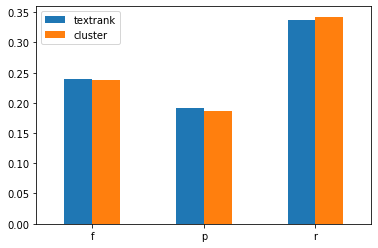

In [16]:
# compare results in bar chart
evaluation.get_barchart(tr_overall, cl_overall, "rouge-1")